In [44]:
from sympy import * 
from sympy.vector import *
from sympy.physics.vector import *
import cryst


# ----------------------------------------------------------------------------#
# ---------------------- DEFINING MODEL ------------------------------------- #
# --------------------------------------------------------------------------- #

# TIGHT-BINDING MODEL FOR GRAPHENE 

# orthonormal system
N = ReferenceFrame('N')

# lattice vectors 
a1 = nsimplify(3/2)*N.x + (sqrt(3)/2)*N.y
a2 = nsimplify(3/2)*N.x - (sqrt(3)/2)*N.y 

pprint(a1), pprint(a2)

# define momentum, lattice, and model parameters
#ndim = 2 
ta, tb, tc, p = symbols('t\u2090 t\u2091 t\u2092 p', real = True)

p1, p2 = symbols('p\u2081 p\u2082', real = True)

#p1 = Dot(p, a1)
#p2 = Dot(p, a2)

elem = -tc - ta * exp(I * p1) - tb * exp(I * p2) 
H = Matrix([[0, elem], [conjugate(elem), 0]])
# write the Hamiltonian 

print("Bloch Hamiltonian:")
pprint(H)

eigvals_muls = H.eigenvals()
eigvals = list(eigvals_muls.keys())

E1, E2 = eigvals[0], eigvals[1]  

print("Eigenvalues:")

pprint(simplify(E1))
pprint(simplify(E2))

# Modify the model:
# We study the finely tuned point in parameter space ta = tb = tc = t

t = symbols('t')

E1 = E1.subs(ta, t)
E1 = E1.subs(tb, t)
E1 = E1.subs(tc, t)

E2 = E2.subs(ta, t)
E2 = E2.subs(tb, t)
E2 = E2.subs(tc, t)

E1, E2 = simplify(E1), simplify(E2)

E1, E2 = E1.as_real_imag(), E2.as_real_imag() 
#pprint(E1)
#pprint(E2) 





          √3
3/2 n_x + ── n_y
          2
          -√3
3/2 n_x + ──── n_y
           2
Bloch Hamiltonian:
⎡                                    ⅈ⋅p₁       ⅈ⋅p₂     ⎤
⎢             0                - tₐ⋅ℯ     - tₑ⋅ℯ     - tₒ⎥
⎢                                                        ⎥
⎢      -ⅈ⋅p₁       -ⅈ⋅p₂                                 ⎥
⎣- tₐ⋅ℯ      - tₑ⋅ℯ      - tₒ              0             ⎦
Eigenvalues:
    __________________________________________________________________________________
   ╱ ⎛    ⅈ⋅p₁       ⅈ⋅p₂     ⎞ ⎛    ⅈ⋅p₂       ⅈ⋅p₁       ⅈ⋅(p₁ + p₂)⎞  -ⅈ⋅(p₁ + p₂) 
-╲╱  ⎝tₐ⋅ℯ     + tₑ⋅ℯ     + tₒ⎠⋅⎝tₐ⋅ℯ     + tₑ⋅ℯ     + tₒ⋅ℯ           ⎠⋅ℯ             
   __________________________________________________________________________________
  ╱ ⎛    ⅈ⋅p₁       ⅈ⋅p₂     ⎞ ⎛    ⅈ⋅p₂       ⅈ⋅p₁       ⅈ⋅(p₁ + p₂)⎞  -ⅈ⋅(p₁ + p₂) 
╲╱  ⎝tₐ⋅ℯ     + tₑ⋅ℯ     + tₒ⎠⋅⎝tₐ⋅ℯ     + tₑ⋅ℯ     + tₒ⋅ℯ           ⎠⋅ℯ             


In [45]:
Esquared = elem * conjugate(elem)


In [46]:
pprint(elem)

      ⅈ⋅p₁       ⅈ⋅p₂     
- tₐ⋅ℯ     - tₑ⋅ℯ     - tₒ


In [47]:
elem = elem.subs(ta, 1)
elem = elem.subs(tb, 1)
elem = elem.subs(tc, 1)

In [48]:
pprint(elem)

   ⅈ⋅p₁    ⅈ⋅p₂    
- ℯ     - ℯ     - 1


In [49]:
# COMPUTE THE LOCUS OF ZERO MODE: THE POINTS IN BZ AT WHICH THE VALENCE AND CONDUCTION BANDS INTERSECT 
zero_mode_loci = solve(elem, dict = True)
pprint(zero_mode_loci)

⎡⎧    2⋅π      -2⋅π ⎫  ⎧    4⋅π      2⋅π⎫⎤
⎢⎨p₁: ───, p₂: ─────⎬, ⎨p₁: ───, p₂: ───⎬⎥
⎣⎩     3         3  ⎭  ⎩     3        3 ⎭⎦


In [50]:
# We find two loci. Let's compute them using cartesian basis 

In [51]:
pprint(zero_mode_loci[0])

⎧    2⋅π      -2⋅π ⎫
⎨p₁: ───, p₂: ─────⎬
⎩     3         3  ⎭


In [52]:
# Get the first momentum point at which the band touching occurs "Rel to K Valley"
K1 = zero_mode_loci[0][p1] * a1 + zero_mode_loci[0][p2] * a2  
pprint(K1)

2⋅√3⋅π
────── n_y
  3


In [53]:
# Get the second momentum point at which the band touching occurs "Rel to Kprime Valley"
K2 = zero_mode_loci[1][p1] * a1 + zero_mode_loci[1][p2] * a2 
pprint(K2)

          √3⋅π
3⋅π n_x + ──── n_y
           3


In [54]:
# Let us get the eigenvalues 

In [55]:
Esquared = Esquared.subs(ta, 1).subs(tb, 1).subs(tc, 1)
Esquared = Esquared.expand()
Esquared = nsimplify(Esquared)
pprint(Esquared)

 ⅈ⋅p₁    ⅈ⋅p₁  -ⅈ⋅p₂    ⅈ⋅p₂        -ⅈ⋅p₂    -ⅈ⋅p₁  ⅈ⋅p₂    -ⅈ⋅p₁
ℯ     + ℯ    ⋅ℯ      + ℯ     + 3 + ℯ      + ℯ     ⋅ℯ     + ℯ     


In [56]:
Esquared = Esquared.as_real_imag()[0].simplify()
pprint(Esquared)

2⋅cos(p₁) + 2⋅cos(p₂) + 2⋅cos(p₁ - p₂) + 3


In [57]:
# The Energies. There's invariance under p ---> -p This is T Reversal Symmetry, which also permutes the roots of the previous algebraic 
# equation. Might be related to Galois group 
E_conduction = sqrt(Esquared)
E_valence = -sqrt(Esquared)
pprint(E_conduction)

  ____________________________________________
╲╱ 2⋅cos(p₁) + 2⋅cos(p₂) + 2⋅cos(p₁ - p₂) + 3 


In [58]:
# Let us plot the bands in a small neighborhood around K1 

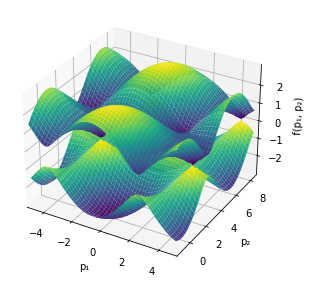

In [59]:
from sympy.plotting import plot, plot3d
K1_eval = K1.evalf()
K1_coords = [K1_eval.dot(N.x), K1_eval.dot(N.y)]
ranx = [K1_coords[0] - 5, K1_coords[0] + 5]
rany = [K1_coords[1] - 5, K1_coords[1] + 5] 
plot3d(E_conduction, E_valence,(p1, ranx[0], ranx[1]), (p2, rany[0], rany[1]))

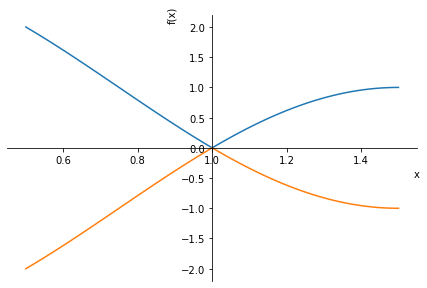

In [63]:
# DIRAC POINT: The model describes a Dirac semimetal 
x = symbols('x')
E_conduction = E_conduction.subs(p1, 2 * pi * x/3).subs(p2, -2 * pi * x/3)
E_valence = E_valence.subs(p1, 2 * pi * x/3).subs(p2, -2 * pi * x/3)
plot(E_conduction, E_valence, (x, 0.5, 1.5))